# Import Libraries and file

For this project, the NumPy, matplotlib, and pandas libraries will be needed. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import file as a DataFrame
titanic = pd.read_csv('MIS542titanic.csv')

# Look at the dataset

In [3]:
#View the first five rows
titanic.head()

,Survived,Passanger Class,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
#View sumarry statistics and check for missing values
titanic.describe()

,Survived,Passanger Class,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Passanger Class          887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare in British Pounds   887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


# Average cost in U.S. dollars of a first-class ticket

First I'll check for duplicated rows so that I am certain my calculations are correct. Next, I will subset the dataframe to include only first class passengers and then take the mean of the columns to get the average cost of a first-class ticket.

To convert from British Pounds to Dollars I will multiply the total in pounds by $1.28.

84.155 x 1.28 = 107.72

**The average cost in dollars for a first class ticket was: $107.72**

In [5]:
#check for duplicated rows
titanic[titanic.duplicated()]

,Survived,Passanger Class,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds


In [6]:
#subset the data frame with just first class passengers and take the mean
(titanic.loc[titanic['Passanger Class'] == 1]).mean()

Survived                    0.629630
Passanger Class             1.000000
Age                        38.788981
Siblings/Spouses Aboard     0.416667
Parents/Children Aboard     0.356481
Fare in British Pounds     84.154687
dtype: float64

# Number of passengers over 20 years old with siblings onboard

Since there are no duplicates in the data, there were 23 pasengers on board over the age of 20 with siblings.

In [7]:
#create a subset of people over the age of 20 with greater than 1 for spouse and take the length to get the sum
len(titanic.loc[(titanic['Age'] > 20.0) & (titanic['Siblings/Spouses Aboard'] >1)])

23

# Median age of those who did not survive

To find the median age of those who did not survive, the dataframe can be subsetted again to only include passengers who did not survive. The median age is the median of that subset. 

**The median age of those who did not survive is 28**

In [8]:
#subset the data frame with just first class passengers and take the median
(titanic.loc[titanic['Survived'] == 0]).median()

Survived                    0.0
Passanger Class             3.0
Age                        28.0
Siblings/Spouses Aboard     0.0
Parents/Children Aboard     0.0
Fare in British Pounds     10.5
dtype: float64

# Percentage of passengers who survived by class

The percentage of passengers who survived in first class was 62%, in second class it was 47%, and in third class it was 24%. Third class passengers had a much lower chance of surviving.

In [9]:
#group the data by class and take the mean of each column
titanic.groupby('Passanger Class').mean()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
Passanger Class,,,,,
1,0.629630,38.788981,0.416667,0.356481,84.154687
2,0.472826,29.868641,0.402174,0.380435,20.662183
3,0.244353,25.188747,0.620123,0.396304,13.707707


# Number of males and females who survived

Females had a much greater chance of surviving. 

In [10]:
#create a new variable of just passengers who survived
survived = titanic[(titanic['Survived'] == 1)]
#group survived passengers by their sex
group = survived.groupby('Sex')['Survived'].count().reset_index()
group

,Sex,Survived
0,female,233
1,male,109


# Number of survived passengers by class

First class pasengers had a greater chance of surviving.

In [11]:
#create a subset of just passengers who survived
survived = titanic[(titanic['Survived'] == 1)]
#group survived passengers by their class
gp = survived.groupby('Passanger Class')['Survived'].count().reset_index()
gp

,Passanger Class,Survived
0,1,136
1,2,87
2,3,119


# Pie chart showing number of males and females

In [12]:
#create a subset counting the total number of males and females
df = titanic.groupby('Sex').count().reset_index()
df

,Sex,Survived,Passanger Class,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
0,female,314,314,314,314,314,314,314
1,male,573,573,573,573,573,573,573


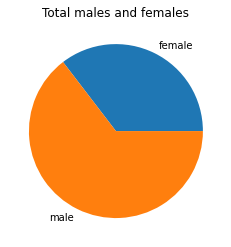

In [13]:
#create a pie chart with total passengers divided up by sex
plt.pie(df['Survived'], labels=df['Sex'])
#make a title
plt.title('Total males and females')
#show the graph
plt.show()

# Bar chart showing count of male and female survivors

In [14]:
#create a grouping of survivors by sex
ss = survived.groupby(['Sex']).count()
ss

,Survived,Passanger Class,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare in British Pounds
Sex,,,,,,,
female,233,233,233,233,233,233,233
male,109,109,109,109,109,109,109


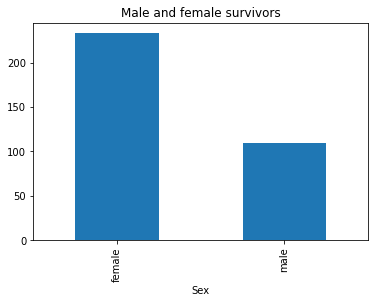

In [15]:
#plot that grouping by survived
ss['Survived'].plot.bar()
plt.title('Male and female survivors')
plt.show()

# Bar chart showing the count of each age

There are too many ages for a bar chart to show useful information. A histogram would be a better choice for this. 

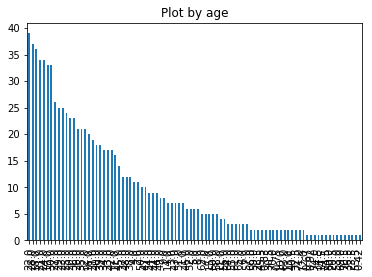

In [17]:
import seaborn as sns
#plot that grouping by survived
titanic['Age'].value_counts().plot.bar()
plt.title('Plot by age')
plt.show()

# Bar plot by age range

It is easier to see the age distribution with a histogram.

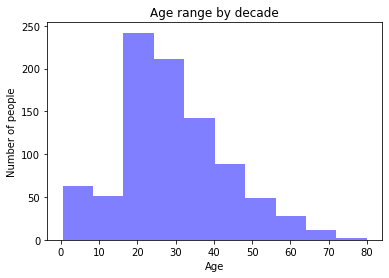

In [317]:
#define the number of bins
num_bins = 10
#setup the histogram
n, bins, patches = plt.hist(age, num_bins, facecolor='blue', alpha=0.5)
#make s and y axis lables
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Age range by decade')
plt.show()

# Pie Chart showing percentage survivors by class

Using the autopct parameter with plt.pie, the percentage of values can be added to the pie chart. 

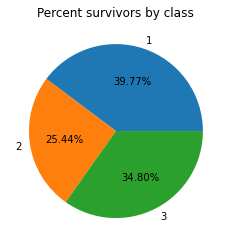

In [310]:
#create a subset counting the passenger class of survivors
surv = survived.groupby('Passanger Class').count().reset_index()
#create a pie chart with total passengers divided by class
plt.pie(surv['Survived'], labels=surv['Passanger Class'], autopct='%1.2f%%')
#make a title
plt.title('Percent survivors by class')
#show the graph
plt.show()

# Pie Chart showing percentage survivors by sex

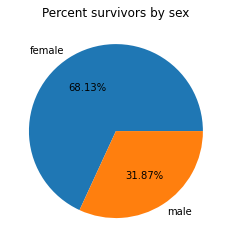

In [312]:
#create a subset counting the total number of males and female survivors
sex = survived.groupby('Sex').count().reset_index()
#create a pie chart with total passengers divided by sex
plt.pie(sex['Survived'], labels=sex['Sex'], autopct='%1.2f%%')
#make a title
plt.title('Percent survivors by sex')
#show the graph
plt.show()

# Lessons learned

This exercise and the reading chapters were very helpful for my learning of pandas and matplotlib. I learned a couple of different ways to subset the dataset. I learned how to use descriptive statistics with pandas and learned how to examine a dataset. I also learned how to create pie charts, bar charts, and histograms. 

# References

McKinney, W. (2017). Python for data analysis: Data wrangling with Pandas, NumPy, and IPython (2nd ed.). O'Reilly Media.

Matplotlib - Pie Chart. (2021). https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm

Matplotlib Histogram. (2021). https://pythonspot.com/matplotlib-histogram/